In [1]:
import pandas as pd
import holoviews as hv
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews.streams import Stream
import param
import parambokeh
import xarray as xr
import numpy as np
import os
import datetime as dt
import pickle
import matplotlib.pyplot as plt

#hv.notebook_extension('bokeh')

In [6]:
#Open dataset after pre-processing raster images
open_dir = '/Users/miksch/Thesis_Files/Processed/landsat/EL_LS8/'
ls8 = xr.open_dataset(os.path.join(open_dir,'ls8_v01.nc'),mask_and_scale=True)

#Create empty data variables for tstar and fr
ls8['tstar'] = xr.Variable(('time','y','x'),ls8['B10'].values)
ls8['FR'] = xr.Variable(('time','y','x'),ls8['NDVI'].values)
ls8['EF'] = xr.Variable(('time','y','x'),ls8['NDVI'].values)

In [24]:
bands = ['B10','NDVI','EF','tstar','FR']

raster_bands = {}
raster_info = {}

for t in ls8['time'].values:
    
    tir = ls8['B10'].sel(time=t).values * .1
    ndvi = ls8['NDVI'].sel(time=t).values
    ef = ls8['EF'].sel(time=t).values
    tstar = ls8['tstar'].sel(time=t).values
    fr = ls8['NDVI'].sel(time=t).values

    raster_bands[str(t.astype(str))] = dict(zip(bands,[tir,ndvi,ef]))
    raster_info[str(t.astype(str))] = {'ndvio':0,'ndvis':0,'tir_max':0,'tir_min':0,
                      'we_points':np.array(([0,0],[0,0]))}
#
pickle.dump(raster_bands,open('raster_bands.p','wb'))    
pickle.dump(raster_info,open('raster_info.p','wb'))
    
    
    

In [33]:
bands = pickle.load(open('raster_bands.p','rb'))
old_vals = pickle.load(open('/Users/miksch/Thesis_Files/Processed/landsat/LS_1617_fmask/raster_info.p','rb'))
new_bands = pickle.load(open('/Users/miksch/Thesis_Files/Processed/landsat/EL_LS8/raster_bands.p','rb'))

In [37]:
out_bands = ['EF','tstar','FR']

for o in out_bands:
    temp_band = []
    for t in new_bands:
        temp_band.append(new_bands[t][o])
    band_array = np.array(temp_band)
    ls8[o] = (('time','y','x'),band_array)

In [39]:
ls8.to_netcdf('/Users/miksch/Thesis_Files/Processed/landsat/EL_LS8/ls8_v02.nc')

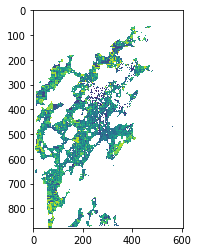

In [19]:
plt.imshow(bands['2016-05-16T00:00:00.000000000']['NDVI'])
plt.show()